In [56]:
def countElements(image_path):
    from skimage.io import imread, imsave
    from skimage.color import rgb2gray
    from skimage.filters import threshold_otsu
    from skimage.morphology import (erosion, dilation, closing, opening, area_closing, area_opening)
    from skimage.measure import label, regionprops
    import matplotlib.pyplot as plt
    
    # lecture image
    im = imread(image_path)
    
    # Pre Traitement selon la nature de l'image
    if len(im.shape) == 2:
        pass
    elif len(im.shape) == 3:
        if im.shape[2] == 3:
            im = rgb2gray(im)
        elif im.shape[2] > 3:
            im = im[:,:,:3]
            im = rgb2gray(im)
            
    # Binarisation
    seuil_otsu = threshold_otsu(im)
    im = im < seuil_otsu
    
    # operations morphologiques
    im_morph = area_closing(area_opening(im, 201), 201)
    
    # labelling
    label_im = label(im_morph)
    
    # extraction blobs
    props = regionprops(label_im)

    area_list = []
    for prop in props:
        area_list.append(prop.area)
    mini = min(area_list)
    
    # comptage et affichage des blob identifiés
    fig, ax = plt.subplots(figsize=(18, 8))
    ax.imshow(label_im)

    count = 0
    for i, prop in enumerate(filter(lambda x: x.area > mini, props)):
        y1, x1, y2, x2 = (prop.bbox[0], prop.bbox[1],
                          prop.bbox[2], prop.bbox[3])
        width = x2 - x1
        height = y2 - y1
        r = plt.Rectangle((x1, y1), width = width, height=height, color='b', fill=False)
        plt.xticks([])
        plt.yticks([])
        ax.add_patch(r)
        count += 1
        
    # enregistrer l'image traitée
    plt.savefig('outimage.png', bbox_inches='tight', pad_inches=0)
        
    # retourner l'image traitée et le nbre d'éléments
    return [label_im, count] 
        
    print("Nombre d'éléments :" , count)

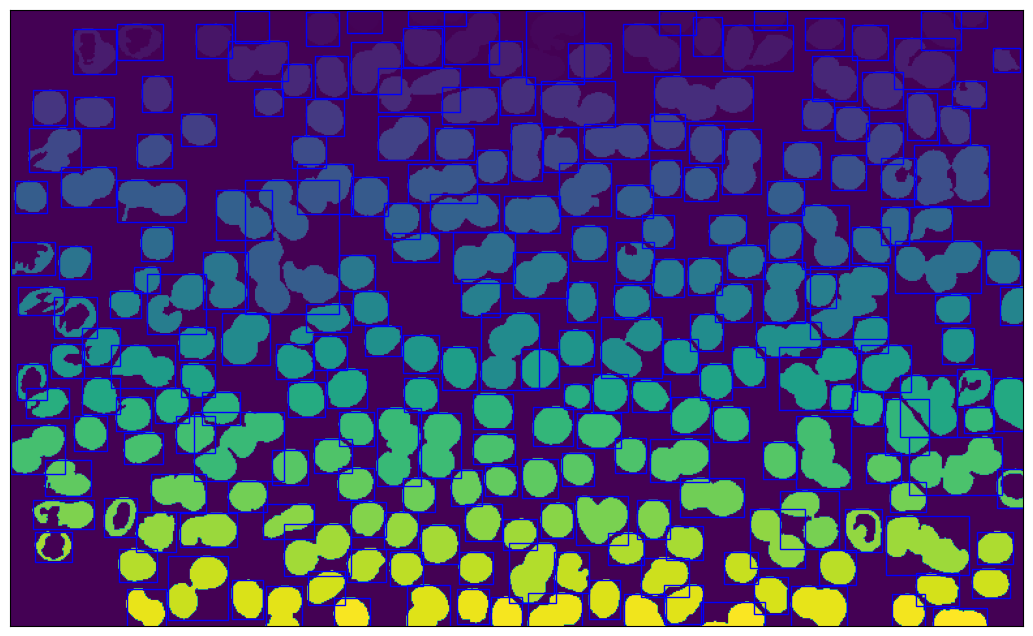

In [57]:
# Test
image_path = 'image.png'
outImage, numberElements = countElements(image_path)

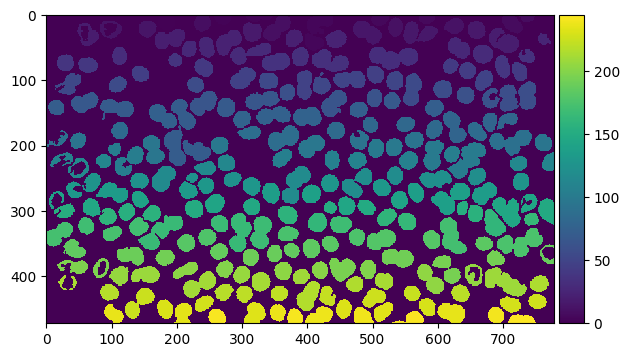

In [54]:
from skimage.io import imshow
imshow(outImage)

In [55]:
numberElements

244